# Interactive figures

In addition to the static figures we have been working with, Matplotlib can produce interactive figures.  For use on a desktop there are bindings to produces figures using the Tk, Gtk, Wx, and Qt frameworks.   These can be used as stand-alone windows are embedded in large applications, see [the gallery](https://matplotlib.org/gallery/#embedding-matplotlib-in-graphical-user-interfaces) for details.

There are two backends to work with IPython/Jupyter notebook:

 - NBAgg which ships with Matplotlib  
   - `%matplotlib notebook`
 - ipympl which is an additional package 
   - `%matplotlib widgets`
 
 


NBAgg only works in the classic IPython notebook but not in Jupyter lab (because the way it works is by injecting a fair amount of javascript into the DOM which is a security hole).  ipympl is built on top of the `ipywidgets` framework and requires a jupyterlab extension to be installed in addition to the python module.
 
If you are in the classic notebook
 
 ```python
%matplotlib notebook
```

will enable NBAgg.  In either the classic notebook or jupyter lab

```python
%matplotlib widget
```

will enable ipympl.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


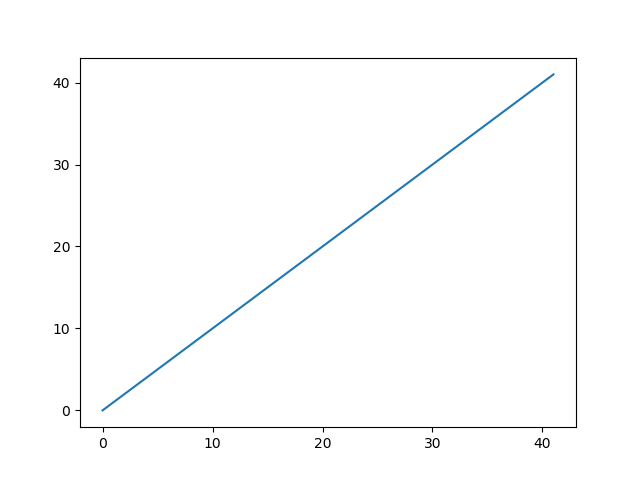

In [2]:
fig, ax = plt.subplots()
ax.plot(range(42))

You should now have an interactive figure that you can pan / zoom around on just like on the desktop.  Matplotlib is using a client-server model for the display, user input is sent from the Jupyter front-end back to Matplotlib running in your kernel and the kernel ships the rendered png to the browser.  This has he advantages that the plots will look identical to using `inline` or the desktop backends and we do not need to ship all of your data to the browser.  However, this approach has will have higher latency than an in-browser plotting library (such as bokeh or plotly).

## print statements and tracebacks in callbacks

Any print statements or tracebacks in user-callbacks will not be naively shown in the notebook (because it is not clear _where_ they should be shown; in a terminal they are printed to stdout of which there is only one, in a notebook there are many output cells, any of which may be the correct place to print).  For convince in the next few notebooks we have provided a helper to make sure that the print statements will be associated with an output area under the `Figure`.

In [3]:
%run helpers/ensure_print.py

Understanding this code is not required for this tutorial, but running the above is required for the following notebooks to run properly.  We are discussing how to solve this in a cleaner way [at ipympl](https://github.com/matplotlib/jupyter-matplotlib/issues/116).

To test that this is working, run the following cell and pan/zoom around.

<IPython.core.display.Javascript object>


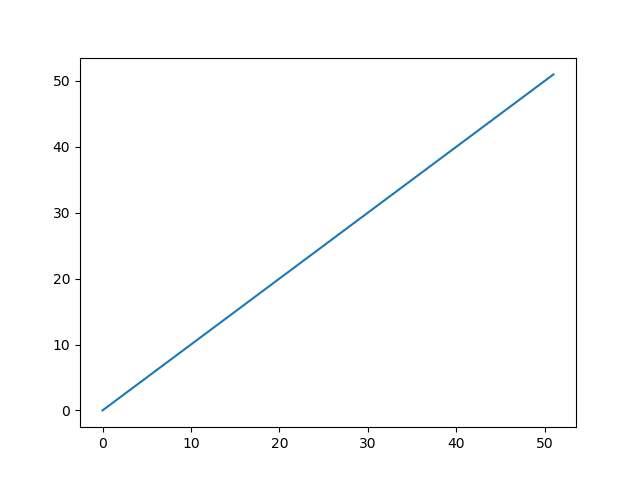

Output()

In [4]:
fig, ax = plt.subplots()
ax.plot(range(52))
fig.canvas.mpl_connect('draw_event', lambda event: print("I Drew!"))